In [1]:
import pandas as pd
import datetime
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel("ClimateArticles.xlsx")

In [3]:
#count number of times "climate change" appears in each article
clinum=[]
for txt in df['Texts']:
    clinum.append(txt.lower().count("climate change"))

In [4]:
#make column for "climate change" count
df['Count']=clinum

In [5]:
#label specific landfall days as "Landfall"
hurrdates=[]
for date in df['Dates']:
    if datetime.fromisoformat('2022-09-28T00:00:00')<=date<=datetime.fromisoformat('2022-09-30T23:59:59'):
        hurrdates.append("Landfall")
    else:
        hurrdates.append("")

In [6]:
#make column for Landfall days
df['Hurricane Ian']=hurrdates

In [7]:
#format date in a way that makes sequential bargraphs by month easier to make
monthyear=[]
for d in df['Dates']:
    #monthyear.append(date(d.year,d.month,15))
    if d.month<10:
        monthyear.append(str(d.year)+'-0'+str(d.month))
    else:
        monthyear.append(str(d.year)+'-'+str(d.month))
df['Date']=monthyear

In [8]:
#make column for Landfall month
hurrdates=[]
for date in df['Dates']:
    if date.year==2022 and date.month==9:
        hurrdates.append("Landfall")
    else:
        hurrdates.append("")
df['Hurricane Ian']=hurrdates

In [9]:
#sort chronologically
df=df.sort_values(by=['Dates'])

In [10]:
#make smaller dataframe out of articles with 3+ climate change mentions
df2=df.loc[df['Count']>2]

In [11]:
#find number of articles by month, chronologically
df['Date'].value_counts().sort_index()

2021-09    64
2021-10    63
2021-11    66
2021-12    33
2022-01    28
2022-02    41
2022-03    38
2022-04    36
2022-05    40
2022-06    32
2022-07    45
2022-08    61
2022-09    30
2022-10    21
2022-11    25
2022-12    26
2023-01    16
2023-02    12
2023-03    17
2023-04    11
2023-05    19
2023-06    26
2023-07    27
2023-08    26
2023-09    28
Name: Date, dtype: int64

### Number of Articles

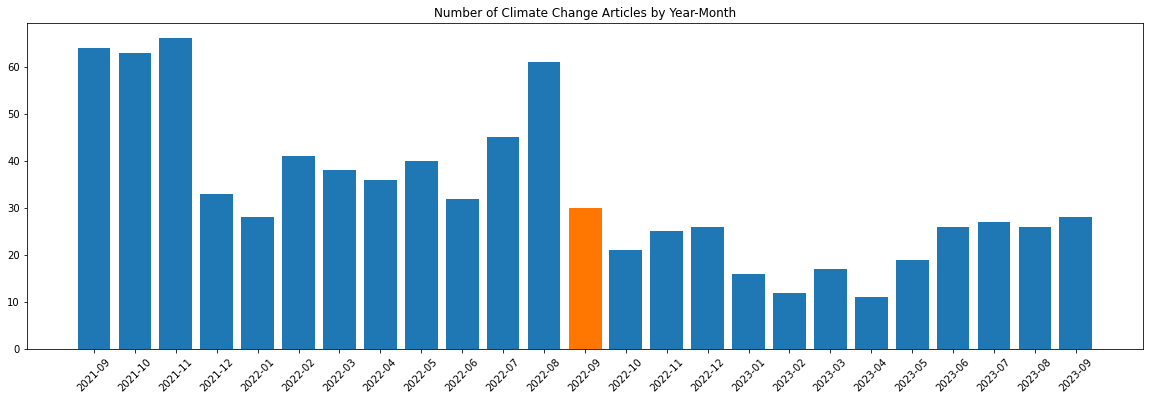

In [12]:
theseries=df['Date'].value_counts().sort_index()
plt.figure(figsize=(20,6))
barlist=plt.bar(theseries.index, theseries.values)
barlist[12].set_color('#FF7700')
plt.xticks(rotation=45)
plt.title("Number of Climate Change Articles by Year-Month")
plt.show()

In [13]:
#make column that identifies whether article is about local events using "Florida"
localnews=[]
for txt in df['Texts']:
    if 'florida' in txt.lower():
        localnews.append('Local')
    else:
        localnews.append('Other')
df['Local to Florida']=localnews

<AxesSubplot:xlabel='Date'>

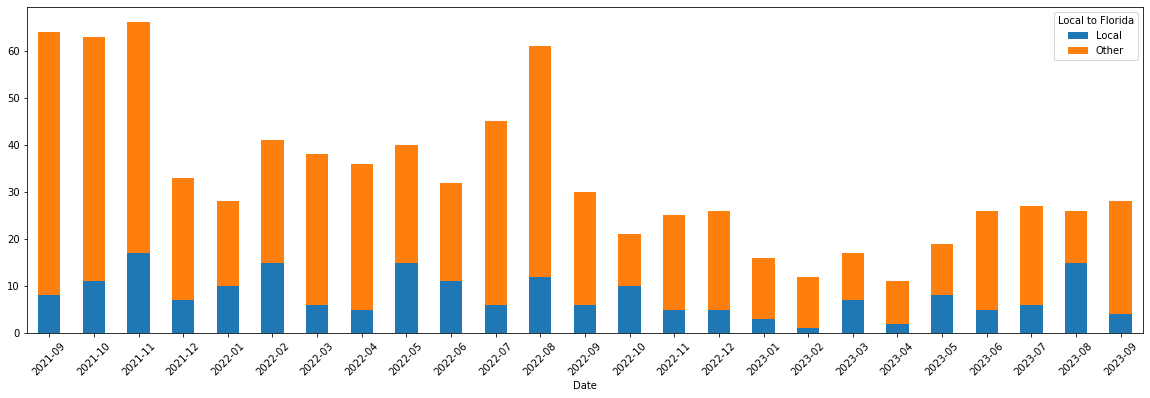

In [14]:
#stacked graph of local/non-local article counts
pd.crosstab(index = df['Date'],
           columns = df['Local to Florida'],
           normalize = False,
           margins = False).plot(kind = 'bar', stacked=True,figsize = (20, 6), rot=45)

In [15]:
#separate local and non-local articles into their own dataframes
localdf=df[df["Local to Florida"]=="Local"]
nonlocaldf=df[df["Local to Florida"]=="Other"]

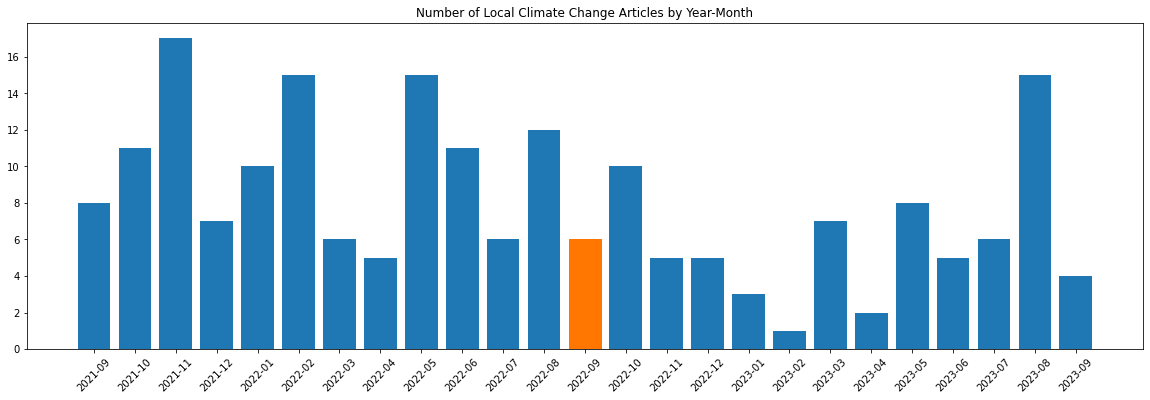

In [16]:
theseries=localdf['Date'].value_counts().sort_index()
plt.figure(figsize=(20,6))
barlist=plt.bar(theseries.index, theseries.values)
barlist[12].set_color('#FF7700')
plt.xticks(rotation=45)
plt.title("Number of Local Climate Change Articles by Year-Month")
plt.show()

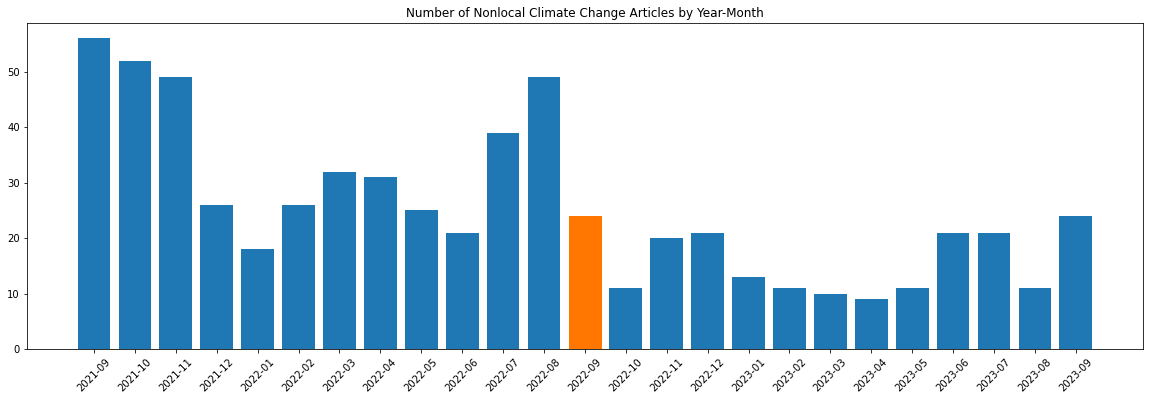

In [17]:
theseries=nonlocaldf['Date'].value_counts().sort_index()
plt.figure(figsize=(20,6))
barlist=plt.bar(theseries.index, theseries.values)
barlist[12].set_color('#FF7700')
plt.xticks(rotation=45)
plt.title("Number of Nonlocal Climate Change Articles by Year-Month")
plt.show()

### Average Climate Change Mentions

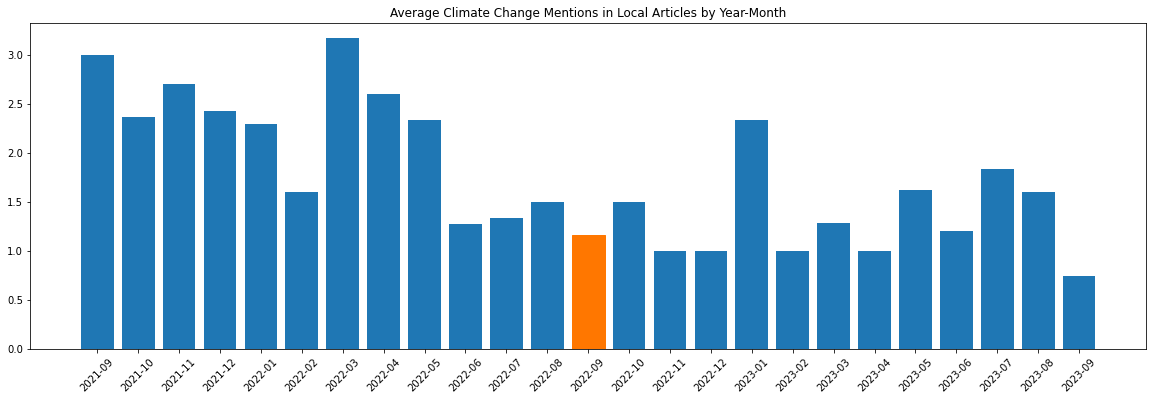

In [18]:
theseries=localdf.groupby('Date')['Count'].mean().sort_index()
plt.figure(figsize=(20,6))
barlist=plt.bar(theseries.index, theseries.values)
barlist[12].set_color('#FF7700')
plt.xticks(rotation=45)
plt.title("Average Climate Change Mentions in Local Articles by Year-Month")
plt.show()

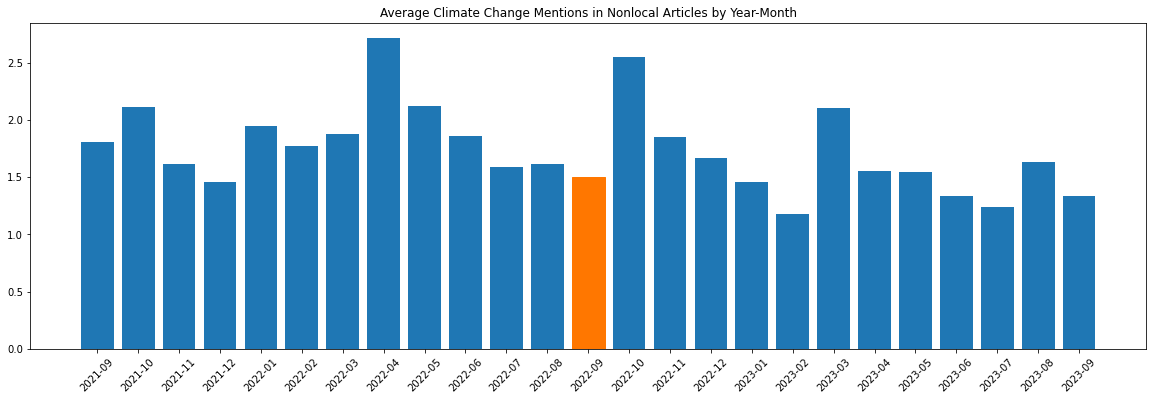

In [19]:
theseries=nonlocaldf.groupby('Date')['Count'].mean().sort_index()
plt.figure(figsize=(20,6))
barlist=plt.bar(theseries.index, theseries.values)
barlist[12].set_color('#FF7700')
plt.xticks(rotation=45)
plt.title("Average Climate Change Mentions in Nonlocal Articles by Year-Month")
plt.show()

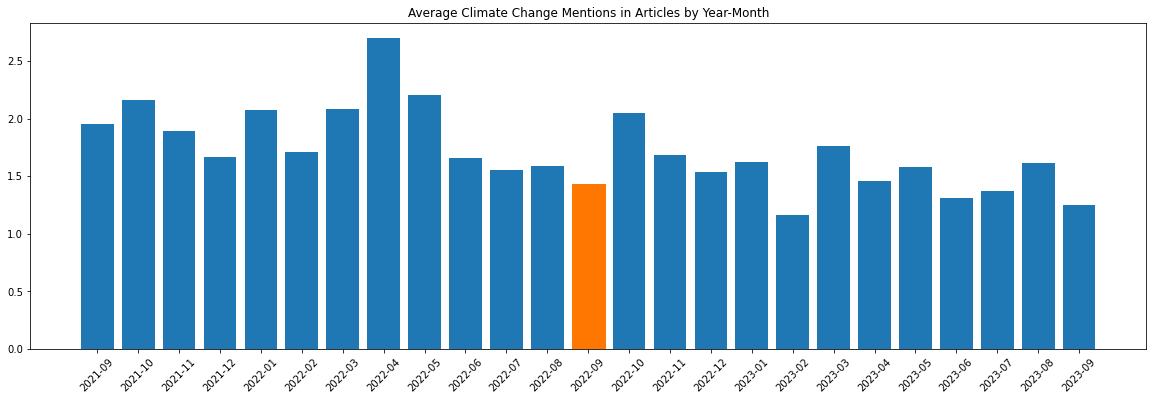

In [20]:
theseries=df.groupby('Date')['Count'].mean().sort_index()
plt.figure(figsize=(20,6))
barlist=plt.bar(theseries.index, theseries.values)
barlist[12].set_color('#FF7700')
plt.xticks(rotation=45)
plt.title("Average Climate Change Mentions in Articles by Year-Month")
plt.show()

/Users/hilaryolesen/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hilaryolesen/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hilaryolesen/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hilaryolesen/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hilaryolesen/opt/anac

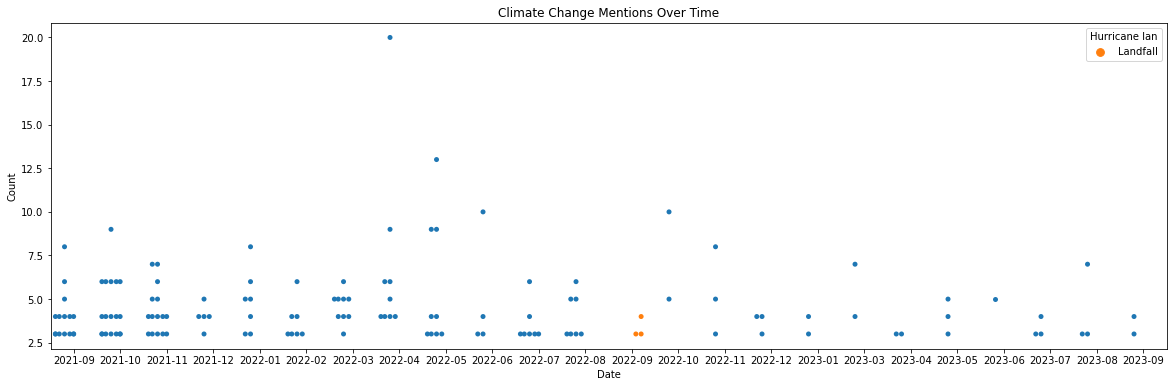

In [21]:
plt.figure(figsize=(20,6))
sns.swarmplot(data=df2, x="Date", y="Count",hue="Hurricane Ian",dodge=True).set(title='Climate Change Mentions Over Time')
#plt.axvline(x=hurrdate)
plt.show()